In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [52]:
df = yf.download('AAPL', 
                      start='2018-01-01', 
                      end='2023-01-01', 
                      progress=False,)

In [53]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

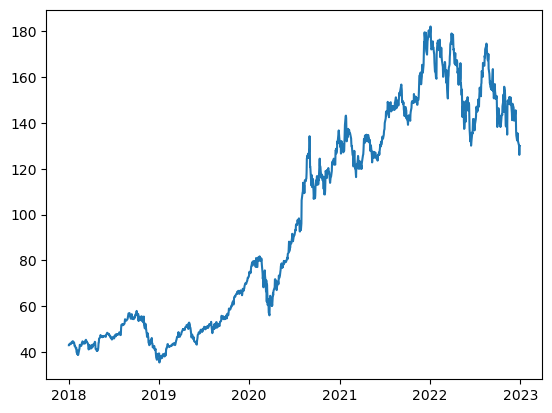

In [54]:
plt.plot(df.Close)

In [55]:
ma100=df.Close.rolling(100).mean()
ma100

Date
2018-01-02           NaN
2018-01-03           NaN
2018-01-04           NaN
2018-01-05           NaN
2018-01-08           NaN
                 ...    
2022-12-23    150.515600
2022-12-27    150.157800
2022-12-28    149.764699
2022-12-29    149.412100
2022-12-30    149.062199
Name: Close, Length: 1259, dtype: float64

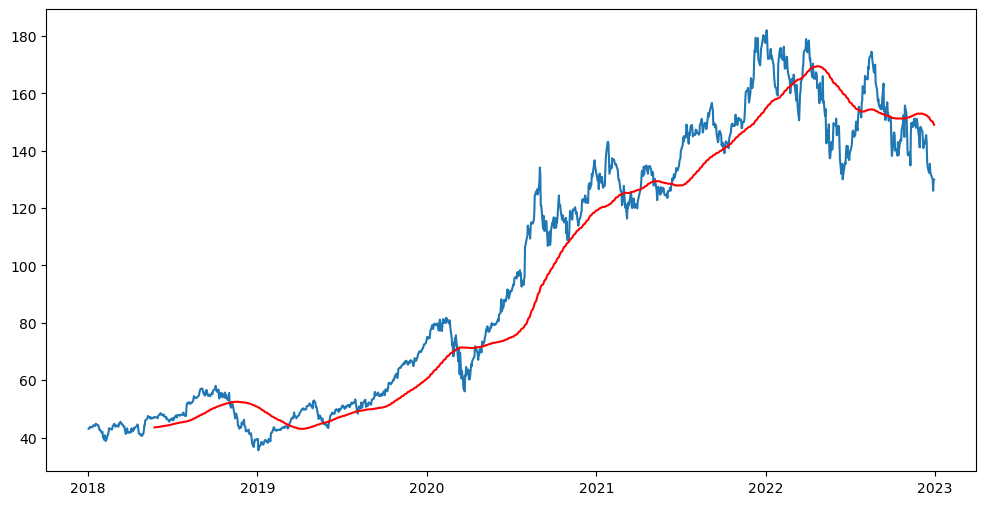

In [56]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

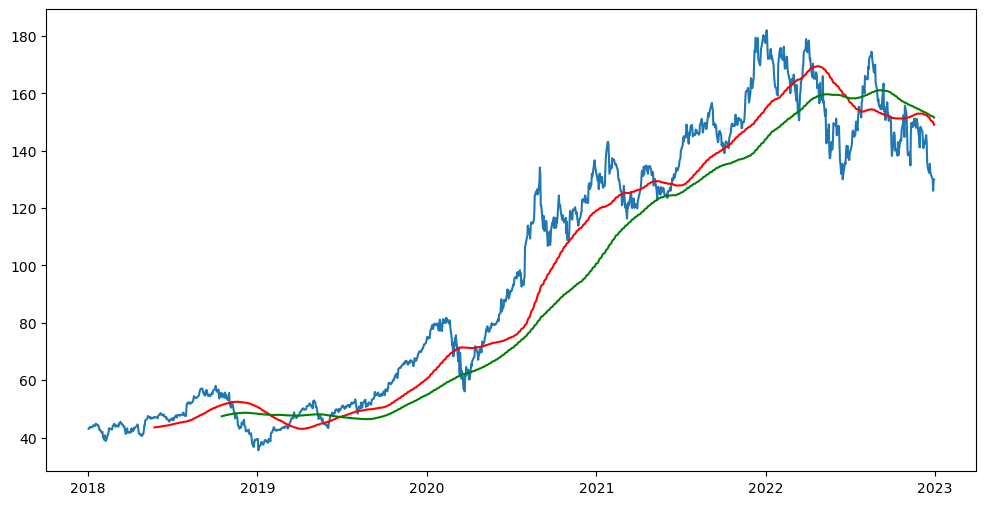

In [57]:
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [58]:
df.shape

(1259, 6)

Splitting into Training and Testing


In [59]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(881, 1)
(378, 1)


In [60]:
data_testing.head()

,Close
Date,
2021-07-02,139.960007
2021-07-06,142.020004
2021-07-07,144.570007
2021-07-08,143.240005
2021-07-09,145.110001


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [62]:
data_training_array=scaler.fit_transform(data_training)

In [63]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [64]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout,Dense

In [65]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape  [1],1)))#introduces non linearity to the model 
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))#to connect all the layers

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [67]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 8s 154ms/step - loss: 0.0969
Epoch 2/50
25/25 [==============================] - 4s 156ms/step - loss: 0.0203
Epoch 3/50
25/25 [==============================] - 5s 220ms/step - loss: 0.0135
Epoch 4/50
25/25 [==============================] - 7s 269ms/step - loss: 0.0128
Epoch 5/50
25/25 [==============================] - 7s 262ms/step - loss: 0.0105
Epoch 6/50
25/25 [==============================] - 7s 262ms/step - loss: 0.0096
Epoch 7/50
25/25 [==============================] - 6s 258ms/step - loss: 0.0109
Epoch 8/50
25/25 [==============================] - 6s 258ms/step - loss: 0.0100
Epoch 9/50
25/25 [==============================] - 7s 266ms/step - loss: 0.0094
Epoch 10/50
25/25 [==============================] - 7s 269ms/step - loss: 0.0094
Epoch 11/50
25/25 [==============================] - 7s 267ms/step - loss: 0.0086
Epoch 12/50
25/25 [==============================] - 7s 278ms/step - loss: 0.0079
Epoch 13/50
25/25 [======

In [68]:
model.save('keras_model.h5')

C:\Users\Aashmit Shrestha\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:2990: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## GRU MODEL IMPLEMENTATION

In [69]:
from keras.layers import GRU
gru_model=Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='relu'))
gru_model.add(Dropout(0.2))
# Second GRU layer
gru_model.add(GRU(units=60, return_sequences=True, input_shape=(x_train.shape[1],1), activation='relu'))
gru_model.add(Dropout(0.3))
# Third GRU layer
gru_model.add(GRU(units=80, return_sequences=True, input_shape=(x_train.shape[1],1), activation='relu'))
gru_model.add(Dropout(0.4))
# Fourth GRU layer
gru_model.add(GRU(units=120, activation='relu'))
gru_model.add(Dropout(0.5))
# The output layer
gru_model.add(Dense(units=1))
# Compiling the RNN

In [70]:
gru_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 100, 50)           7950      
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 gru_9 (GRU)                 (None, 100, 60)           20160     
                                                                 
 dropout_17 (Dropout)        (None, 100, 60)           0         
                                                                 
 gru_10 (GRU)                (None, 100, 80)           34080     
                                                                 
 dropout_18 (Dropout)        (None, 100, 80)           0         
                                                                 
 gru_11 (GRU)                (None, 120)              

In [71]:
gru_model.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
gru_model.fit(x_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 26s 401ms/step - loss: 0.1107
Epoch 2/50
25/25 [==============================] - 12s 461ms/step - loss: 0.0225
Epoch 3/50
25/25 [==============================] - 10s 405ms/step - loss: 0.0119
Epoch 4/50
25/25 [==============================] - 10s 404ms/step - loss: 0.0110
Epoch 5/50
25/25 [==============================] - 10s 411ms/step - loss: 0.0103
Epoch 6/50
25/25 [==============================] - 10s 405ms/step - loss: 0.0093
Epoch 7/50
25/25 [==============================] - 13s 533ms/step - loss: 0.0116
Epoch 8/50
25/25 [==============================] - 13s 525ms/step - loss: 0.0101
Epoch 9/50
25/25 [==============================] - 11s 427ms/step - loss: 0.0073
Epoch 10/50
25/25 [==============================] - 10s 412ms/step - loss: 0.0080
Epoch 11/50
25/25 [==============================] - 10s 402ms/step - loss: 0.0086
Epoch 12/50
25/25 [==============================] - 10s 405ms/step - loss: 0.0063
Epoch 13/50
2

In [72]:
gru_model.save('GRU.h5')

In [73]:
past_100_days=data_training.tail(100)

In [74]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Aashmit Shrestha\AppData\Local\Temp\ipykernel_21472\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [75]:
final_df.head()

,Close
0,136.009995
1,135.389999
2,135.130005
3,135.369995
4,133.190002


In [76]:
input_data=scaler.fit_transform(final_df)

In [77]:
input_data.shape

(478, 1)

In [78]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [79]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


In [80]:
#making predictions
y_predicted=model.predict(x_test)
y_predicted2=gru_model.predict(x_test)

12/12 [==============================] - 3s 108ms/step


In [81]:
sc=scaler.scale_
#gives the factor by which the values were scaled down 

In [82]:
scale_factor=1/sc

y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor
y_predicted2=y_predicted2*scale_factor

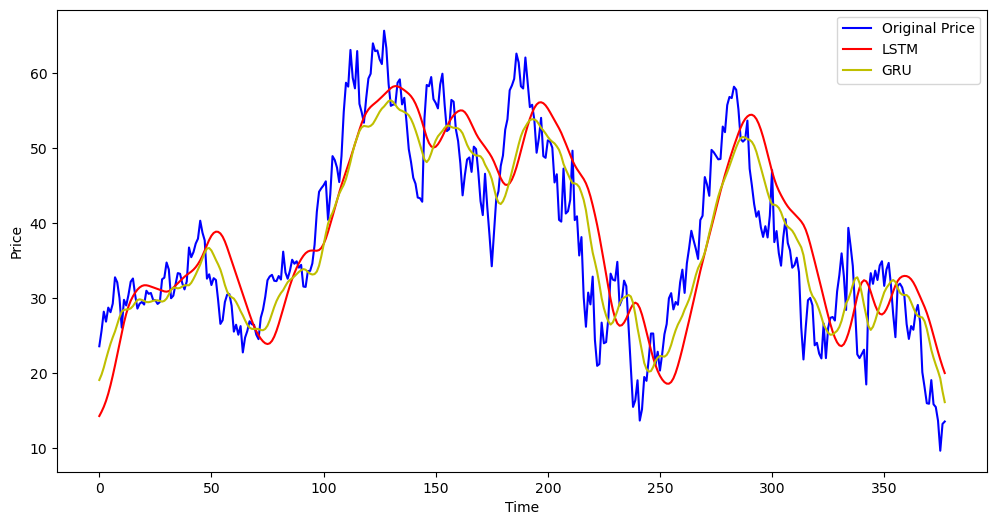

In [83]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='LSTM')
plt.plot(y_predicted2,'y',label='GRU')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Error Evaluation

In [84]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
def return_error(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    mae=mean_absolute_error(test,predicted)
    mape=mean_absolute_percentage_error(test,predicted)
    print("The root mean squared error is {}.".format(rmse))
    print("The mean absolute error is {}.".format(mae))
    print("The mean absolute percentage error {}.".format(mape))
    return rmse,mae,mape

In [85]:
error_LSTM=return_error(y_test,y_predicted)
error_LSTM

The root mean squared error is 7.408717410388672.
The mean absolute error is 6.239823801132778.
The mean absolute percentage error 0.19456681806085843.


(7.408717410388672, 6.239823801132778, 0.19456681806085843)

In [86]:
error_GRU=return_error(y_test,y_predicted2)
error_GRU

The root mean squared error is 5.679735809841862.
The mean absolute error is 4.610477735911267.
The mean absolute percentage error 0.13765462128552367.


(5.679735809841862, 4.610477735911267, 0.13765462128552367)

In [87]:
error_df=pd.DataFrame(columns=('Model','RMSE'))
error_data=[('LSTM',error_LSTM[0],error_LSTM[1],error_LSTM[2]),('GRU',error_GRU[0],error_GRU[1],error_GRU[2])]
error_df=pd.DataFrame(error_data,columns=('Model','RMSE','MAE','MAPE'))

In [88]:
error_df

,Model,RMSE,MAE,MAPE
0,LSTM,7.408717,6.239824,0.194567
1,GRU,5.679736,4.610478,0.137655
